<a href="https://colab.research.google.com/github/bonitr02/datasci_7_geospatial/blob/main/datasci_7_geospatial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HHA 507 Assignment 7

# Load Packages

In [ ]:
import requests
import requests
import pandas as pd
import numpy as np
import re
import geopandas as gpd
import matplotlib.pyplot as plt
import urllib.parse
import os
import json

#from dotenv import load_dotenv
#load_dotenv()

# GCP Maps API

## Geocoding

In [ ]:
# import data
list1 = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK7/assignment7_slim_hospital_addresses.csv')
print(list1)

                                                   NAME  \
0                                      ANDALUSIA HEALTH   
1                             ATHENS LIMESTONE HOSPITAL   
2                             ATMORE COMMUNITY HOSPITAL   
3                           BAPTIST MEDICAL CENTER EAST   
4                          BAPTIST MEDICAL CENTER SOUTH   
...                                                 ...   
8008                                UNIVERSITY HOSPITAL   
8009  CHILDREN'S HOSPITAL OF COLORADO - COLORADO SPR...   
8010                  OCHSNER MEDICAL COMPLEX IBERVILLE   
8011               MERCY HEALTH FOUNTIAN MEDICAL CAMPUS   
8012  KANSAS CITY UNIVERSITY OF MEDIICINE AND BIOSCI...   

                                       ADDRESS              CITY STATE  
0     849 SOUTH THREE NOTCH STREET, PO BOX 760         ANDALUSIA    AL  
1                       700 WEST MARKET STREET            ATHENS    AL  
2                          401 MEDICAL PARK DR            ATMORE    AL  

In [ ]:
# return addresses only in a new database, limit to 100
list_of_address = list1.iloc[:,1].sample(100)
print(list_of_address)

2395    809 WEST BRAMLEY, PO BOX 310
2800            1001 GAUSE BOULEVARD
5984          7800 OAKMONT BOULEVARD
216          1111 EAST MCDOWELL ROAD
689                      900 HYDE ST
                    ...             
5234            746 JEFFERSON AVENUE
5055        1015 WEST BALTIMORE PIKE
6004               1353 NORTH TRAVIS
2009         850 WEST IRVING PARK RD
4901               520 MEDICAL DRIVE
Name: ADDRESS, Length: 100, dtype: object


In [ ]:
google_response = []

In [ ]:
# define function to return lat/long/address for all addresses listed in the dataframe
def geocoding(list_of_address):
    for address in list_of_address:

        api_key = os.getenv("GOOGLE_MAPS_API")

        search = 'https://maps.googleapis.com/maps/api/geocode/json?address='

        # convert location to url friendly string
        location = urllib.parse.quote(address)
        url = search + location + '&key=' + api_key

        # get response
        response = requests.get(url)
        response.text

        # get json
        json = response.json()
        results = json['results'][0]
        geometry = results['geometry']
        location = geometry['location']

        lat_raw = location['lat']
        lng_raw = location['lng']

        final = {'address': address, "lat":lat_raw, "lng":lng_raw}
        google_response.append(final)

        print(f'...finished with {address}')


In [ ]:
# execute function
geocoding (list_of_address)

...finished with 809 WEST BRAMLEY, PO BOX 310
...finished with 1001 GAUSE BOULEVARD
...finished with 7800 OAKMONT BOULEVARD
...finished with 1111 EAST MCDOWELL ROAD
...finished with 900 HYDE ST
...finished with 409 SOUTH SECOND STREET
...finished with 1121 NE 2ND AVENUE
...finished with 11401 INTERSTATE 30
...finished with 520 MADISON OAK


IndexError: ignored

In [ ]:
df = pd.DataFrame(google_response)
print(df)

                        address        lat         lng
0  809 WEST BRAMLEY, PO BOX 310  38.083320  -99.903297
1          1001 GAUSE BOULEVARD  30.283667  -89.770154
2        7800 OAKMONT BOULEVARD  32.665678  -97.423662
3       1111 EAST MCDOWELL ROAD  33.454474 -111.977418
4                   900 HYDE ST  37.789380 -122.416729
5       409 SOUTH SECOND STREET  38.208758  -85.762486
6            1121 NE 2ND AVENUE  25.785333  -80.190649
7           11401 INTERSTATE 30  34.657231  -92.402964
8               520 MADISON OAK  29.620023  -98.490204


## Reverse Geocoding




In [152]:
df1 = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK7/assignment7_slim_hospital_coordinates.csv')
print(df1)

              X           Y
0     44.020105  -92.439313
1     45.315368  -96.445816
2     44.112014  -93.251092
3     44.928985  -93.362230
4     46.593809  -95.593160
...         ...         ...
3303  40.500067  -74.347278
3304  38.968781 -104.754827
3305  30.266626  -91.219417
3306  39.939755  -83.811348
3307  37.057467  -94.526985

[3308 rows x 2 columns]


In [ ]:
df_coord = df1.sample(100)

latitudeDF = df_coord.iloc[:,0]
longitudeDF = df_coord.iloc[:,1]

In [ ]:
coordinate_response = []

In [ ]:
# reverse function
def revgeocode(latitudeDF, longitudeDF):
    for x in latitudeDF, longitudeDF:
        api_key = os.getenv("GOOGLE_MAPS_API")

        search2 = 'https://maps.googleapis.com/maps/api/geocode/json?latlng='

        latitude_clean = urllib.parse.quote(str(latitudeDF))
        longitude_clean = urllib.parse.quote(str(longitudeDF))

        url_request_string = search2 + latitude_clean + ',' + longitude_clean + '&key=' + api_key
        url_request_string

        response = requests.get(url_request_string)
        response_dictionary = response.json()

        lat_long = response_dictionary['results'][0]['geometry']['location']
        lat_response = lat_long['lat']
        lng_response = lat_long['lng']

        final = {'address': x, 'lat': lat_response, 'lon': lng_response}
        coordinate_response.append(final)
        return final

In [ ]:
#execute function
revgeocode (latitudeDF, longitudeDF)

In [ ]:
df_fincor = pd.DataFrame(coordinate_response)
print(df_fincor)

# Geospatial Data Processing and Visualization

## Geospatial Data Set #1

### Dataset Attributes:
This dataset contains the information regarding hazardous sites in Vermont

Source of Contamination is the column chosen to be mapped out using geolocation

In [ ]:
df1 = gpd.read_file('/content/Brownfields.geojson')
df1.dtypes

SiteNumber                    int64
Land_Use_Restriction         object
SiteName                     object
Address                      object
Town                         object
Priority                     object
Staff                        object
ClosureDate                  object
SiteStatus                   object
BrownfieldStatus             object
Source_Of_Contamination      object
Contaminants                 object
DocLink                      object
LatY                        float64
LongX                       float64
ArcGeometry                  object
geometry                   geometry
dtype: object

In [ ]:
print(df1)

     SiteNumber Land_Use_Restriction                          SiteName  \
0        770005                  Yes         Ethan Allen Beecher Falls   
1        770035                  Yes                 Dowty Electronics   
2        770083                   No                   Topsham Plating   
3        770092                   No                 Windsor Town Dump   
4        770126                  Yes                   CV  Railway Inc   
..          ...                  ...                               ...   
136    20235240                   No                          Ada Farm   
137    20235244                   No                  119 Gates Street   
138    20235297                   No                     2099 North Rd   
139    20235357                   No  Woodbury Route 14 Linear Project   
140    20235367                   No                   314 Hill Street   

                   Address               Town Priority             Staff  \
0                 Route 27         

In [ ]:
df1[['Source_Of_Contamination', 'geometry']].sort_values(by=['Source_Of_Contamination'], ascending=False)

,Source_Of_Contamination,geometry
45,Unknown,POINT (-72.57510 42.81750)
106,Unknown,POINT (-72.61620 44.59000)
31,Unknown,POINT (-73.18770 42.89300)
86,Unknown,POINT (-72.56000 42.84980)
38,Unknown,POINT (-73.08580 44.80900)
...,...,...
136,None,POINT (-72.62750 43.23870)
137,None,POINT (-72.32030 43.64840)
138,None,None
139,None,None


### Observations

- Although geometric data was presented, a map did not load because the geometry data represented 'POINTS' not 'MULTIPOLYGON'


- Map is small, indicating the data has been taken from a small location

- There are multiple colors demonstrated on the map, indicating different categories

- There are so many categories that the legend impairs a full view of the map

<Axes: >

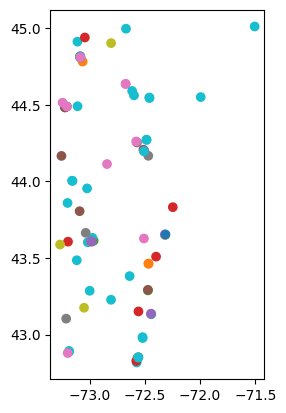

In [ ]:
df1.plot("Source_Of_Contamination", legend=False)

<Axes: >

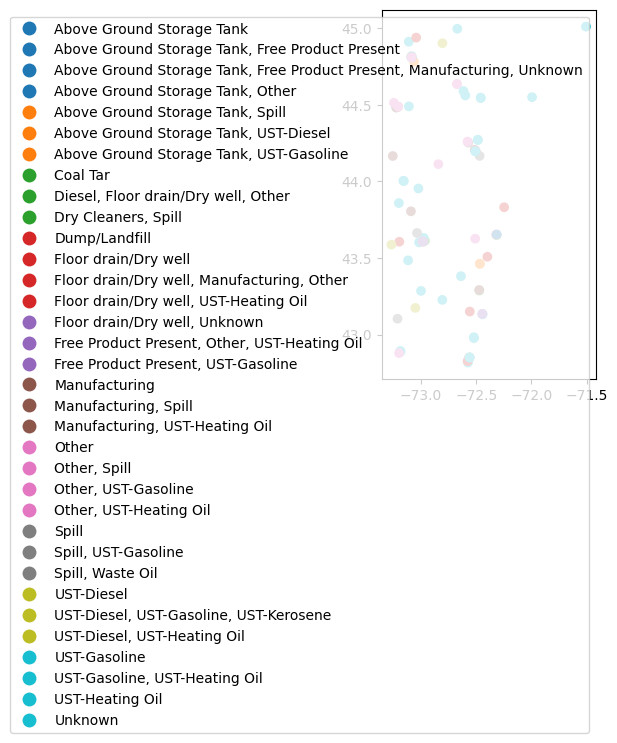

In [ ]:
df1.plot("Source_Of_Contamination", legend=True)

## Geospatial Data Set #2

### Dataset Attributes:
This dataset describes the birth statistics located in Lake County, Illinois.

Birth Rate was the column chosen to map

In [ ]:
df2 = gpd.read_file('/content/Birth_Statistics.geojson')
df2.dtypes

FID                int64
ZIP               object
LBW              float64
Preterm          float64
TeenBirth        float64
Birth_Rate       float64
F1stTriCare      float64
SHAPE_Length     float64
SHAPE_Area       float64
geometry        geometry
dtype: object

In [ ]:
print(df2)

    FID    ZIP       LBW   Preterm  TeenBirth  Birth_Rate  F1stTriCare  \
0     1  60002  0.084837  0.134124       18.5   10.440239    74.639700   
1     2  60010  0.052208  0.080828        1.4    3.219561    86.189946   
2     3  60015  0.095519  0.101959        1.8    7.635261    83.544132   
3     4  60020  0.077067  0.087777       29.9   13.737068    79.075398   
4     5  60030  0.071311  0.086675        6.2   10.598146    81.745316   
5     6  60031  0.081407  0.098994       10.1   10.265032    78.372131   
6     7  60035  0.067941  0.088888        3.6    8.161008    84.821850   
7     8  60040  0.081060  0.116597       21.7   14.259259    81.801379   
8     9  60042  0.057217  0.103992        5.2    5.142590    74.762789   
9    10  60044  0.045741  0.077593        4.8    8.494268    84.421498   
10   11  60045  0.048820  0.076689        0.3    4.886430    84.572198   
11   12  60046  0.068126  0.085630        9.1   10.183884    80.923184   
12   13  60047  0.071366  0.098070    

In [ ]:
df2[['Birth_Rate', 'ZIP']].sort_values(by=['Birth_Rate'], ascending=False)

,Birth_Rate,ZIP
21,18.080633,60085
18,17.024766,60073
16,15.457919,60064
22,14.863123,60087
7,14.259259,60040
20,13.912523,60084
3,13.737068,60020
25,13.486458,60099
14,13.367328,60060
26,11.987291,60041


### Observations

- Map of the county loaded because the geometry data represented 'MULTIPOLYGON'

- Data aggregation by location is clearly defined

<Axes: >

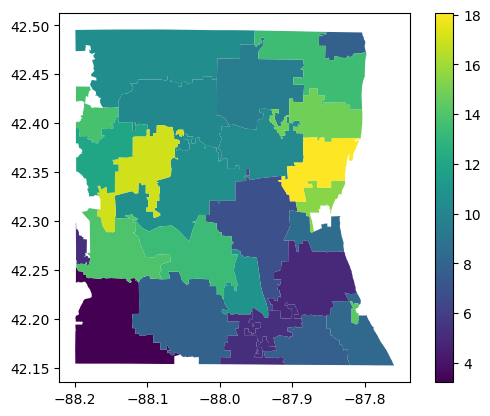

In [ ]:
df2.plot("Birth_Rate", legend=True)

## Geospatial Data Set #3

### Dataset Attributes:
This dataset describes health insurance coverage rates in Detroit, Michigan.

Individuals with no health insurance was the chosen attribute to map against the geolocation

In [ ]:
df3 = gpd.read_file('/content/HealthInsuranceCoverage.geojson')
df3.columns
df3.dtypes

OBJECTID                  int64
GEOID10                  object
TotalCivilianPop          int64
WithHealthInsurance       int64
NoHealthInsurance         int64
Pct_Insured             float64
WithInsurance_U18         int64
NoInsurance_U18           int64
Pct_Insured_U18         float64
geometry               geometry
dtype: object

In [ ]:
print(df3)

     OBJECTID  GEOID10  TotalCivilianPop  WithHealthInsurance  \
0           1  2648371             23014                21364   
1           2  2648380              7064                 6716   
2           3  2648081             20565                18725   
3           4  2648315             26833                25097   
4           5  2648317             26511                23397   
..        ...      ...               ...                  ...   
173       174  2648124             30505                27822   
174       175  2648183             42363                39498   
175       176  2648154             37431                35536   
176       177  2648240             17463                15065   
177       178  2648125             19815                16902   

     NoHealthInsurance  Pct_Insured  WithInsurance_U18  NoInsurance_U18  \
0                 1650     0.928305               5789              123   
1                  348     0.950736               1608               

In [ ]:
df3[['NoHealthInsurance', 'geometry']].sort_values(by=['NoHealthInsurance'], ascending=False)

,NoHealthInsurance,geometry
69,9421,"POLYGON ((-83.23633 42.33578, -83.23731 42.335..."
68,9215,"MULTIPOLYGON (((-83.22188 42.30871, -83.22223 ..."
132,8957,"POLYGON ((-83.10721 42.32522, -83.10714 42.325..."
170,8945,"POLYGON ((-83.11620 42.35425, -83.11596 42.354..."
133,8675,"POLYGON ((-83.04241 42.42631, -83.04133 42.426..."
...,...,...
117,91,"POLYGON ((-83.18311 42.86964, -83.18311 42.869..."
154,0,"POLYGON ((-83.33297 42.23877, -83.32784 42.240..."
56,0,"POLYGON ((-83.04391 42.49178, -83.04469 42.491..."
73,0,"POLYGON ((-83.06253 42.32337, -83.06301 42.323..."


### Observations

- Map of Detroit loaded because the geometry data is labeled as 'MULTIPOLYGON'or POLYGON

- Map is diversely colored, showcasing areas with a large number of uninsured individuals

<Axes: >

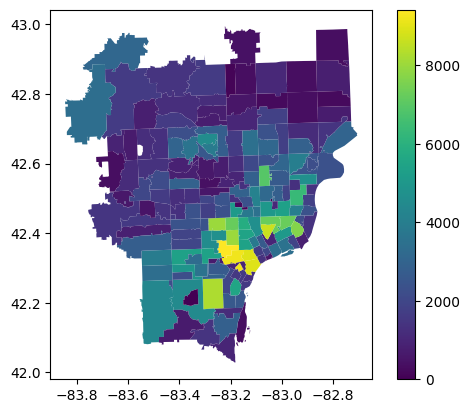

In [ ]:
df3.plot("NoHealthInsurance", legend=True)

## Geospatial Data Set #4

### Dataset Attributes:
This dataset describes the birth statistics by school district in Michigan

Total Births was the attribute chosen to map

In [ ]:
df4 = gpd.read_file('/content/Births_bySD_2014.geojson')
df4.columns

Index(['OBJECTID', 'LABEL', 'GEOID10', 'DistrictName', 'TotalBirths',
       'NonHispWhite', 'NonHispBlack', 'NonHIspOther', 'Hispanic',
       'InadequatePrenatal', 'LowBirthWeight', 'TeenMothers', 'SQMILES',
       'Shape__Area', 'Shape__Length', 'geometry'],
      dtype='object')

In [ ]:
print(df4)

     OBJECTID                LABEL  GEOID10  \
0           1       Adams Township  2601890   
1           2              Addison  2601920   
2           3               Adrian  2601950   
3           4              Airport  2601980   
4           5      Akron-Fairgrove  2602010   
..        ...                  ...      ...   
542       543      Powell Township     None   
543       544   Sigel Township #3F     None   
544       545   Sigel Township #4F     None   
545       546  Verona Township #1F     None   
546       547       Wells Township     None   

                          DistrictName  TotalBirths  NonHispWhite  \
0       Adams Township School District         42.0          40.0   
1            Addison Community Schools         72.0          68.0   
2          Adrian City School District        353.0         261.0   
3    Airport Community School District        195.0         187.0   
4              Akron-Fairgrove Schools         28.0          26.0   
..                   

In [ ]:
df4[['TotalBirths', 'geometry']].sort_values(by=['TotalBirths'], ascending=False)

,TotalBirths,geometry
147,9784.0,"POLYGON ((-83.16104 42.25496, -83.16112 42.255..."
215,3014.0,"MULTIPOLYGON (((-85.62306 42.88951, -85.62444 ..."
298,1952.0,"POLYGON ((-84.53510 42.82756, -84.52316 42.827..."
497,1878.0,"POLYGON ((-83.09100 42.61383, -83.09102 42.614..."
140,1801.0,"POLYGON ((-83.24018 42.34304, -83.24001 42.343..."
...,...,...
542,NaN,"MULTIPOLYGON (((-87.74840 46.70798, -87.75192 ..."
543,NaN,"MULTIPOLYGON (((-82.88755 43.83829, -82.88753 ..."
544,NaN,"POLYGON ((-82.80132 43.81837, -82.80148 43.821..."
545,NaN,"MULTIPOLYGON (((-82.85330 43.78099, -82.85071 ..."


### Observations

- Map of Michigan loaded because the geometry data is labeled as 'MULTIPOLYGON'or POLYGON

- Map is almost uniform colored, only showing small areas with a higher birth rate

- Blank space is attributed to the Great Lakes



<Axes: >

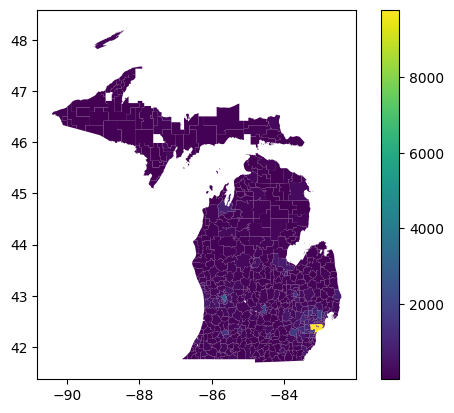

In [ ]:
df4.plot("TotalBirths", legend=True)

## Geospatial Data Set #5



### Dataset Attributes:
This dataset describes the inventory data and benefits of trees located in the City of Tempe.

Yearly pollution removal was the chosen attribute to map against the geolocation

In [ ]:
df5 = gpd.read_file('/content/Tree_Inventory.geojson')
df5.columns
df5.dtypes

OBJECTID                              int64
Tree_ID                               int64
Species_Name                         object
DBH__in_                              int64
Replacement_Value____               float64
Carbon_Storage__lb_                 float64
Carbon_Storage____                  float64
Gross_Carbon_Sequestration__lb_     float64
Gross_Carbon_Sequestration____y     float64
Avoided_Runoff__ftÂ__yr_            float64
Avoided_Runoff____yr_               float64
Carbon_Avoided__lb_yr_               object
Carbon_Avoided____yr_                object
Pollution_Removal__oz_yr_           float64
Pollution_Removal____yr_            float64
Energy_Savings____yr_                object
Total_Annual_Benefits____yr_        float64
xCoordinate                         float64
yCoordinate                         float64
User_ID                               int64
Date                                 object
geometry                           geometry
dtype: object

In [ ]:
df5[['Pollution_Removal____yr_', 'geometry']].sort_values(by=['Pollution_Removal____yr_'], ascending=False)

,Pollution_Removal____yr_,geometry
19483,32.82,POINT (-111.93193 33.43669)
20026,32.82,POINT (-111.93868 33.43569)
20025,30.12,POINT (-111.93666 33.44754)
16986,29.59,POINT (-111.94288 33.45453)
16985,27.46,POINT (-111.93260 33.44184)
...,...,...
21236,0.02,POINT (-111.94282 33.43712)
1907,0.01,POINT (-111.91579 33.41229)
20997,0.01,POINT (-111.88186 33.38713)
20996,0.01,POINT (-111.94877 33.40891)


### Observations

- Although geometric data was presented, a map did not load because the geometry data represented 'POINTS' not 'MULTIPOLYGON'

- Majority of map is the same color and in a small range, indicating that the data is similiar and within a small area

<Axes: >

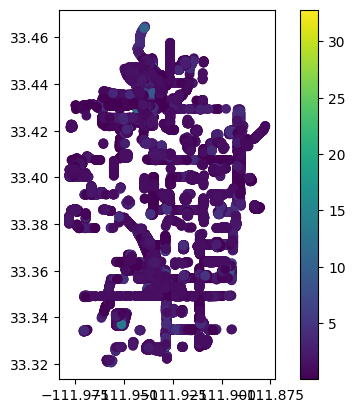

In [ ]:
df5.plot("Pollution_Removal____yr_", legend=True)